## Paired t-tests

We have a number of pairs of data values. The two data values in a pair belong to two different groups. We are interested in whether there is a difference between the two groups.

The most common application of this technique is in statistical analysis of data from planned experiments.

The situation could be the following: we have n individuals, each of whom has been subjected to two “treatments”. We want to examine whether there is a difference between the two treatments and possibly find the average difference.

This situation is referred to as *matched pairs*.

The hypothesis is that the mean difference between the two groups is 0.

$$t = \frac{\bar{d} - \mu_0}{s_d}$$

Where:
- $d$ is a vector of the differences between paired sample $x$ and $y$
- $\bar{d}$ is the mean of the differences
- $\mu_0$ will typically be zero, meaning the null hypothesis is that there is no difference between
 $x$ and $y$
 - $s_d$ is the standard deviation of the differences

If all differences are 0, we get $t = 0$. Values of t close to $0$ are “good” for our hypothesis.
Values of $t$ far from 0 are “bad” for the hypothesis. If $t$ is far from $0$, we therefore reject the hypothesis. This corresponds to an average difference far from $0$.

### Examples (Paired t-tests)

In [15]:
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
exercise = sns.load_dataset('exercise')
exercise

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
...,...,...,...,...,...,...
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running


There are 30 people in the dataset, with their pulse taken at three different time points in an experiment (i.e, after one, 15, and 30 minutes). Ten people were assigned to each of three activity groups:

In [4]:
np.unique(exercise['kind'], return_counts=True)

(array(['rest', 'running', 'walking'], dtype=object), array([30, 30, 30]))

Within each of those activity groups, half of the participants are on a low-fat diet while the other half are on a no-fat diet:

In [5]:
np.unique(exercise['diet'], return_counts=True)

(array(['low fat', 'no fat'], dtype=object), array([45, 45]))

Let's only consider one of the six experimental groups, say the walking, no-fat dieters:

In [6]:
walk_no = exercise[(exercise.diet == 'no fat') & (exercise.kind == 'walking')]
walk_no

,Unnamed: 0,id,diet,pulse,time,kind
45,45,16,no fat,84,1 min,walking
46,46,16,no fat,86,15 min,walking
47,47,16,no fat,89,30 min,walking
48,48,17,no fat,103,1 min,walking
49,49,17,no fat,109,15 min,walking
50,50,17,no fat,90,30 min,walking
51,51,18,no fat,92,1 min,walking
52,52,18,no fat,96,15 min,walking
53,53,18,no fat,101,30 min,walking
54,54,19,no fat,97,1 min,walking


Note how participant 16 has a relatively low heart rate at all three timepoints, whereas participant 20 has a relatively high heart rate at all three timepoints.

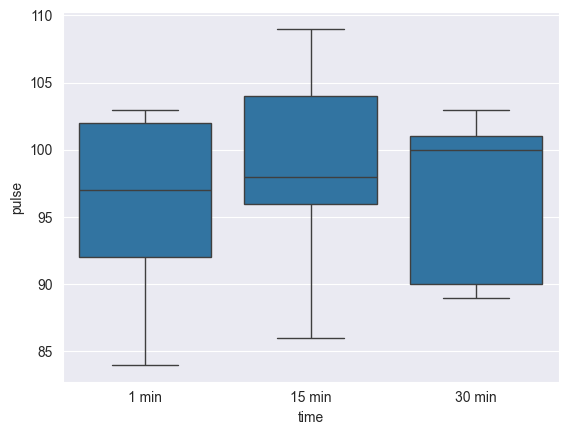

In [7]:
_ = sns.boxplot(x='time', y='pulse', data=walk_no)

In [8]:
min1 = walk_no[walk_no.time == '1 min']['pulse'].to_numpy()
min1

array([ 84, 103,  92,  97, 102])

In [9]:
min1.mean()

np.float64(95.6)

In [10]:
min15 = walk_no[walk_no.time == '15 min']['pulse'].to_numpy()
min15

array([ 86, 109,  96,  98, 104])

In [11]:
min15.mean()

np.float64(98.6)

In [12]:
min30 = walk_no[walk_no.time == '30 min']['pulse'].to_numpy()
min30

array([ 89,  90, 101, 100, 103])

In [13]:
min30.mean()

np.float64(96.6)

With paired samples, we can plot the values in a scatterplot, which wouldn't make any sense for independent samples

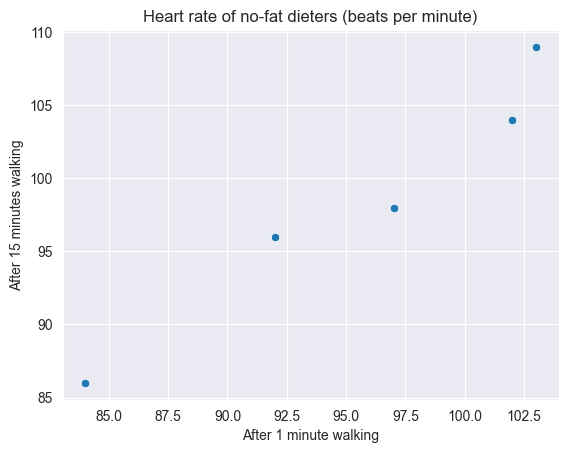

In [16]:
sns.scatterplot(x=min1, y=min15)
plt.title('Heart rate of no-fat dieters (beats per minute)')
plt.xlabel('After 1 minute walking')
_ = plt.ylabel('After 15 minutes walking')

In [17]:
d = min15 - min1
d

array([2, 6, 4, 1, 2])

In [18]:
dbar = d.mean()
dbar

np.float64(3.0)

In [19]:
sd = st.sem(d)
sd

np.float64(0.8944271909999159)

In [20]:
t = (dbar-0)/sd
t

np.float64(3.3541019662496847)

In [37]:
# p from t
2 * st.t.cdf(-abs(t), len(d)-1)

np.float64(0.02846020325433834)

In [26]:
st.ttest_rel(min15, min1)

TtestResult(statistic=np.float64(3.3541019662496847), pvalue=np.float64(0.02846020325433834), df=np.int64(4))

In contrast, if we were to put the same values into an independent t-test...

In [27]:
st.ttest_ind(min15, min1, equal_var=False)

TtestResult(statistic=np.float64(0.5729114862838532), pvalue=np.float64(0.5826164805627767), df=np.float64(7.91150470414055))